In [14]:
import metabolate.core as meta
import glob
import pandas as pd

conf = meta.load_config()
dfs = [meta.mzml_to_df(p) for p in glob.glob('./ExampleFilesMod/Sample2*')]
df = pd.concat(dfs, sort=True).reset_index()

meta.gen_error_cols(df, conf['MS1COLSTOMATCH'], conf['ERRORINFO'])
rtree = meta.build_rtree(df, conf['MS1ERRORCOLS'])
con_comps = meta.gen_con_comps(rtree, meta.get_rects(df, conf['MS1ERRORCOLS']))
ndf = meta.proc_con_comps(con_comps,df,conf,conf['MINREPS'])
# print(list(rtree.leaves()))

./ExampleFilesMod/Sample2_2.mzML


./ExampleFilesMod/Sample2_3.mzML


./ExampleFilesMod/Sample2_1.mzML


In [15]:
df.head()

,index,PrecIntensity,PrecMz,RetTime,Sample,mode,mslevel,PrecMz_low,PrecMz_high,RetTime_low,RetTime_high
0,0,1289.954102,204.696457,0.03405,Sample2_2,+,1,204.695433,204.697480,0.00405,0.06405
1,1,2009.954102,299.925598,0.03405,Sample2_2,+,1,299.924099,299.927098,0.00405,0.06405
2,2,1049.954102,652.077148,0.03405,Sample2_2,+,1,652.073888,652.080409,0.00405,0.06405
3,3,1225.954102,656.651550,0.03405,Sample2_2,+,1,656.648267,656.654834,0.00405,0.06405
4,4,1062.636719,790.139709,0.03405,Sample2_2,+,1,790.135759,790.143660,0.00405,0.06405


In [16]:
print(df.shape)
print(ndf.shape)
ndf.head()

(486, 11)
(162, 4)


,PrecMz,RetTime,PrecIntensity,Sample
0,204.696457,0.03405,1289.954102,Sample2_3|Sample2_2|Sample2_1
1,299.925598,0.03405,2009.954102,Sample2_3|Sample2_2|Sample2_1
2,652.077148,0.03405,1049.954102,Sample2_3|Sample2_2|Sample2_1
3,656.651550,0.03405,1225.954102,Sample2_3|Sample2_2|Sample2_1
4,790.139709,0.03405,1062.636719,Sample2_3|Sample2_2|Sample2_1


In [17]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

import numpy as np

In [18]:
leaves = rtree.leaves()

In [19]:
leaves[0]

(2,
 [210,
  48,
  52,
  214,
  376,
  53,
  377,
  215,
  55,
  379,
  217,
  378,
  216,
  54,
  218,
  380,
  56,
  223,
  61,
  385,
  60,
  222,
  384,
  62,
  386,
  224,
  388,
  64,
  226,
  63,
  387,
  225,
  394,
  70,
  232,
  234,
  72,
  396,
  74,
  75,
  237,
  399,
  236,
  398,
  404,
  242,
  403,
  244,
  406,
  82,
  79,
  241,
  243,
  80,
  405,
  81,
  250,
  88,
  412,
  87,
  249,
  411,
  267,
  105,
  104,
  428,
  266,
  429,
  430,
  106],
 [203.14673511573793, 0.22528332599999998, 772.9621777798462, 0.55761668])

In [20]:
height = lambda x: x[2] - x[0]
width = lambda x: x[2] - x[1]

In [21]:
boxes = [l[2] for l in leaves]
x = df.RetTime.values
y = df.PrecMz.values
x1 = ndf.RetTime.values
y1 = ndf.PrecMz.values

<IPython.core.display.Javascript object>


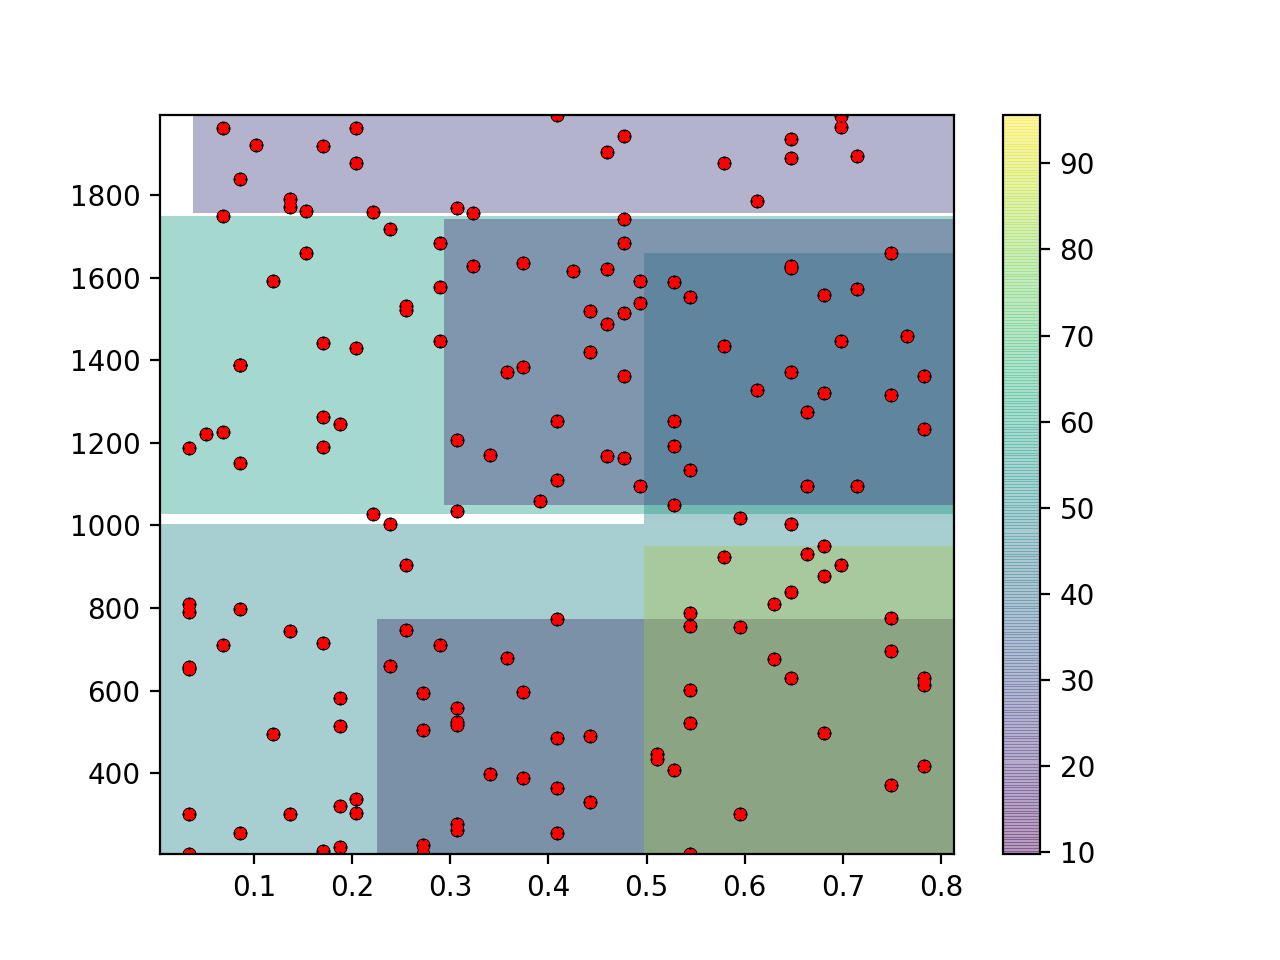

In [22]:
patches = []
for b in boxes:
    patches.append(Rectangle((b[1], b[0]), width(b), height(b), fill=False))
    
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))

%matplotlib notebook
fig, ax = plt.subplots()

ax.add_collection(p)
plt.scatter(x, y, s=15, c='black')
plt.scatter(x1, y1, s=10, c='red', marker='X')

fig.colorbar(p, ax=ax)

maxes = rtree.bounds
plt.axis([maxes[1], maxes[3], maxes[0], maxes[2]])
plt.show()

In [ ]:
fig.set_size_inches(18.5, 10.5)
fig.savefig('testRects.png', dpi=100)